Dataset loaded successfully. Shape: (1482, 20)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhe

<ipython-input-2-047b011eda01>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-2-047b011eda01>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

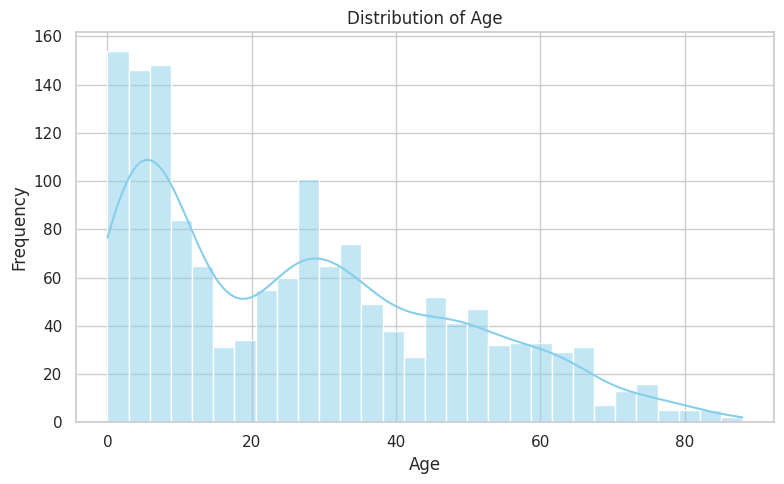

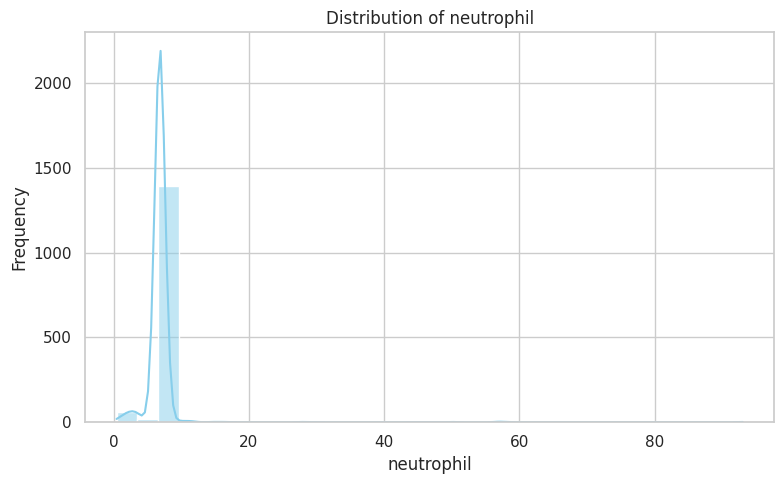

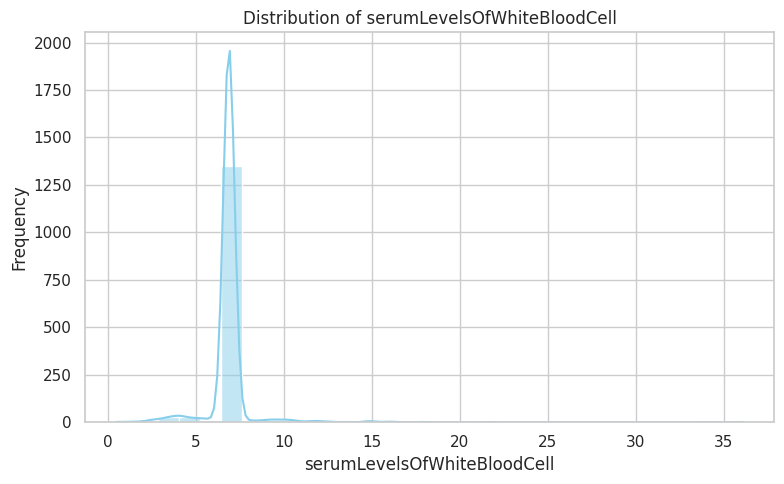

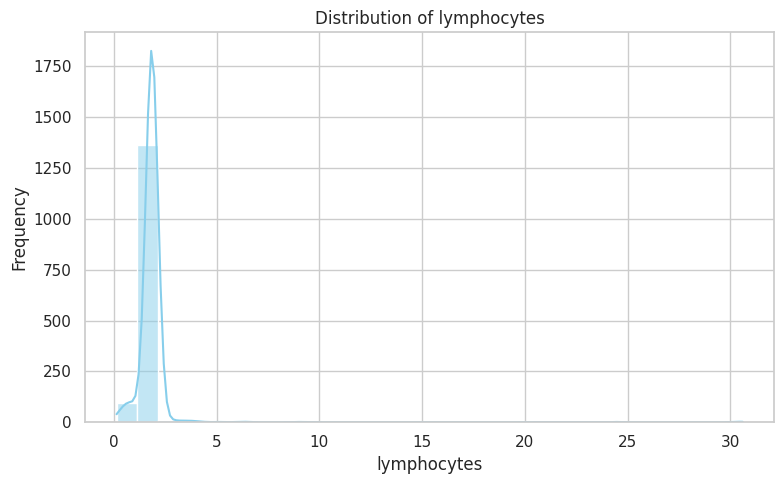

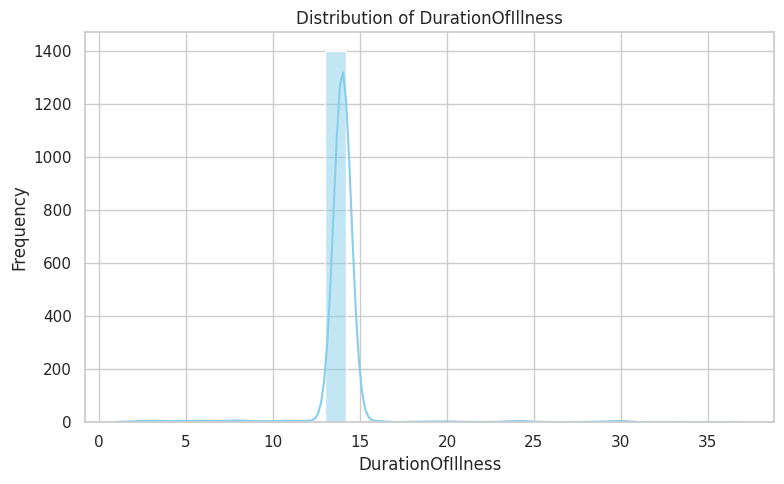

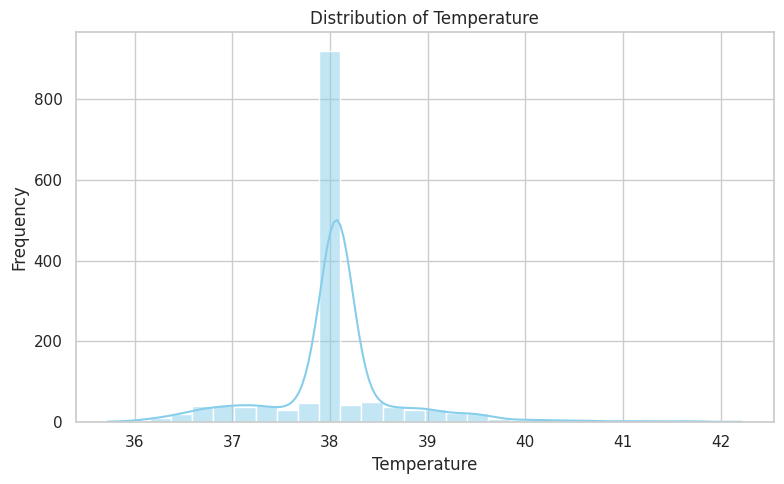


--- Boxplots ---


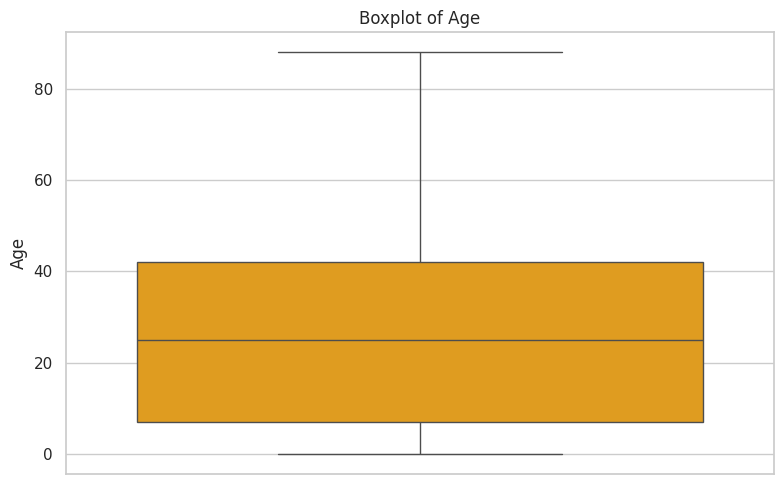

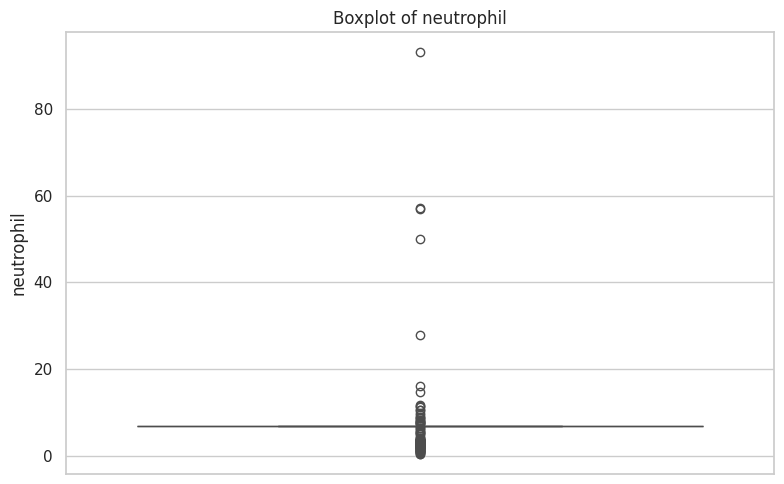

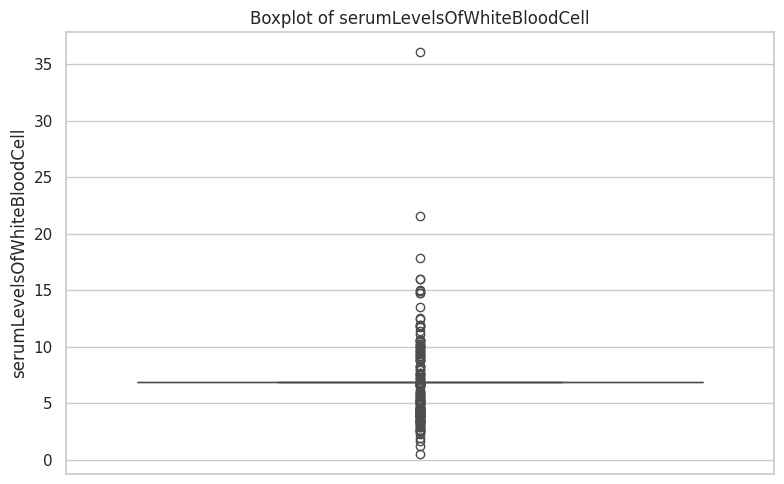

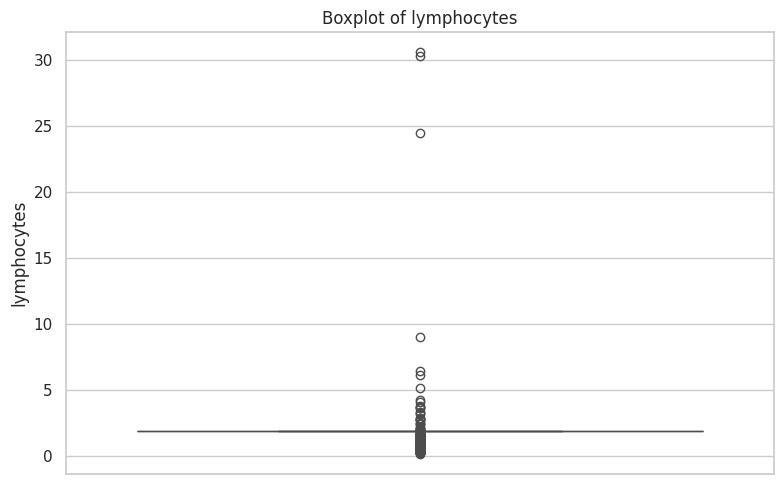

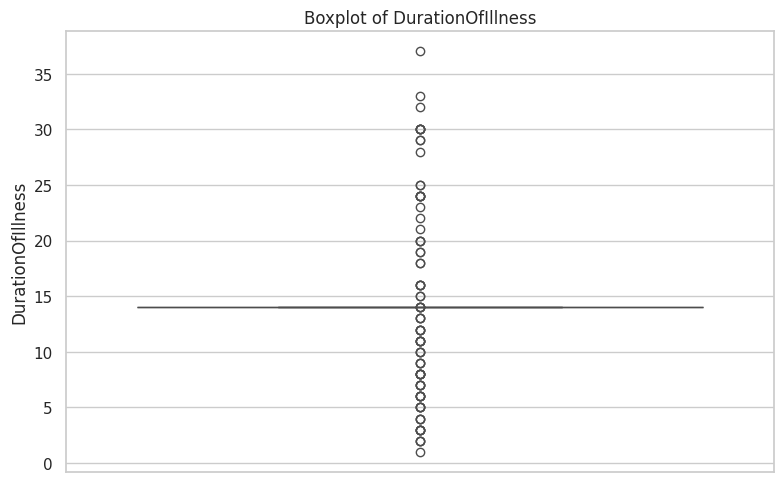

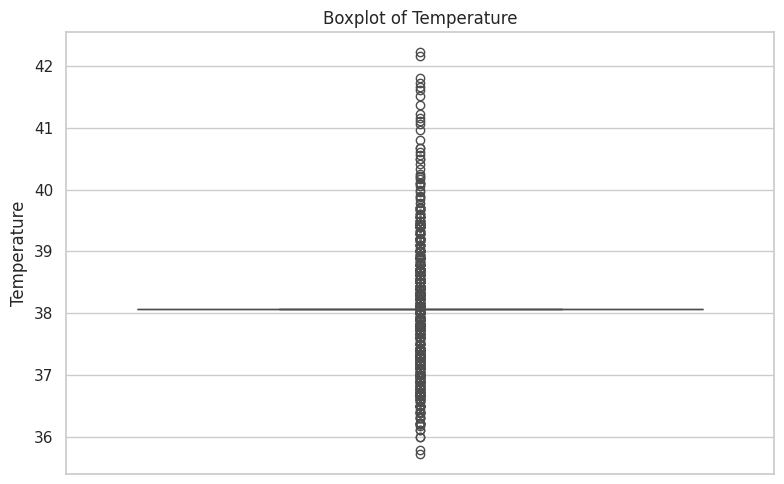


--- Correlation Heatmap ---


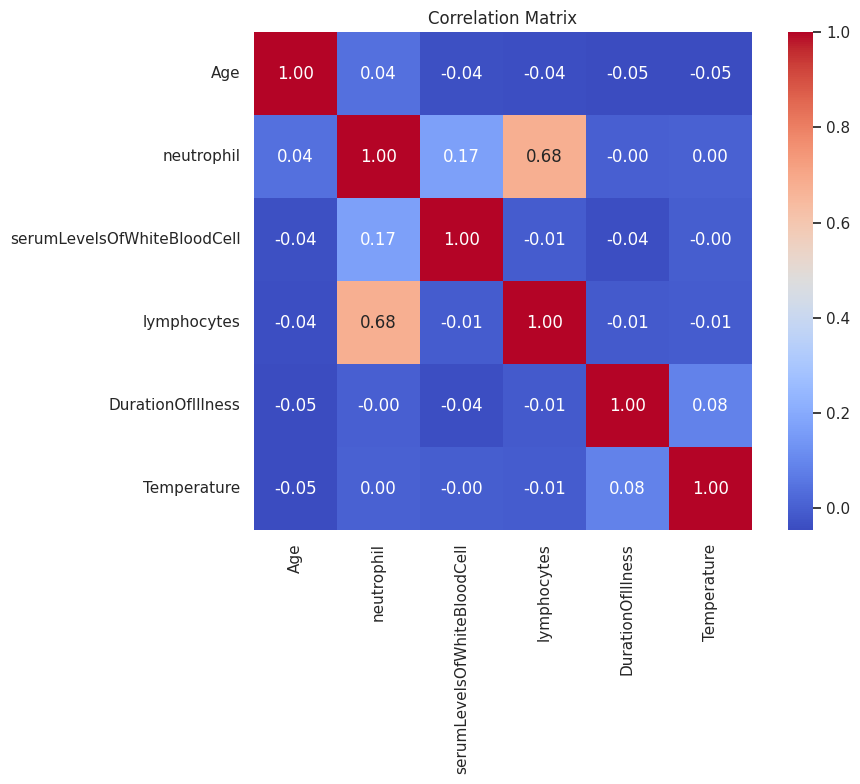


--- Pairplot ---


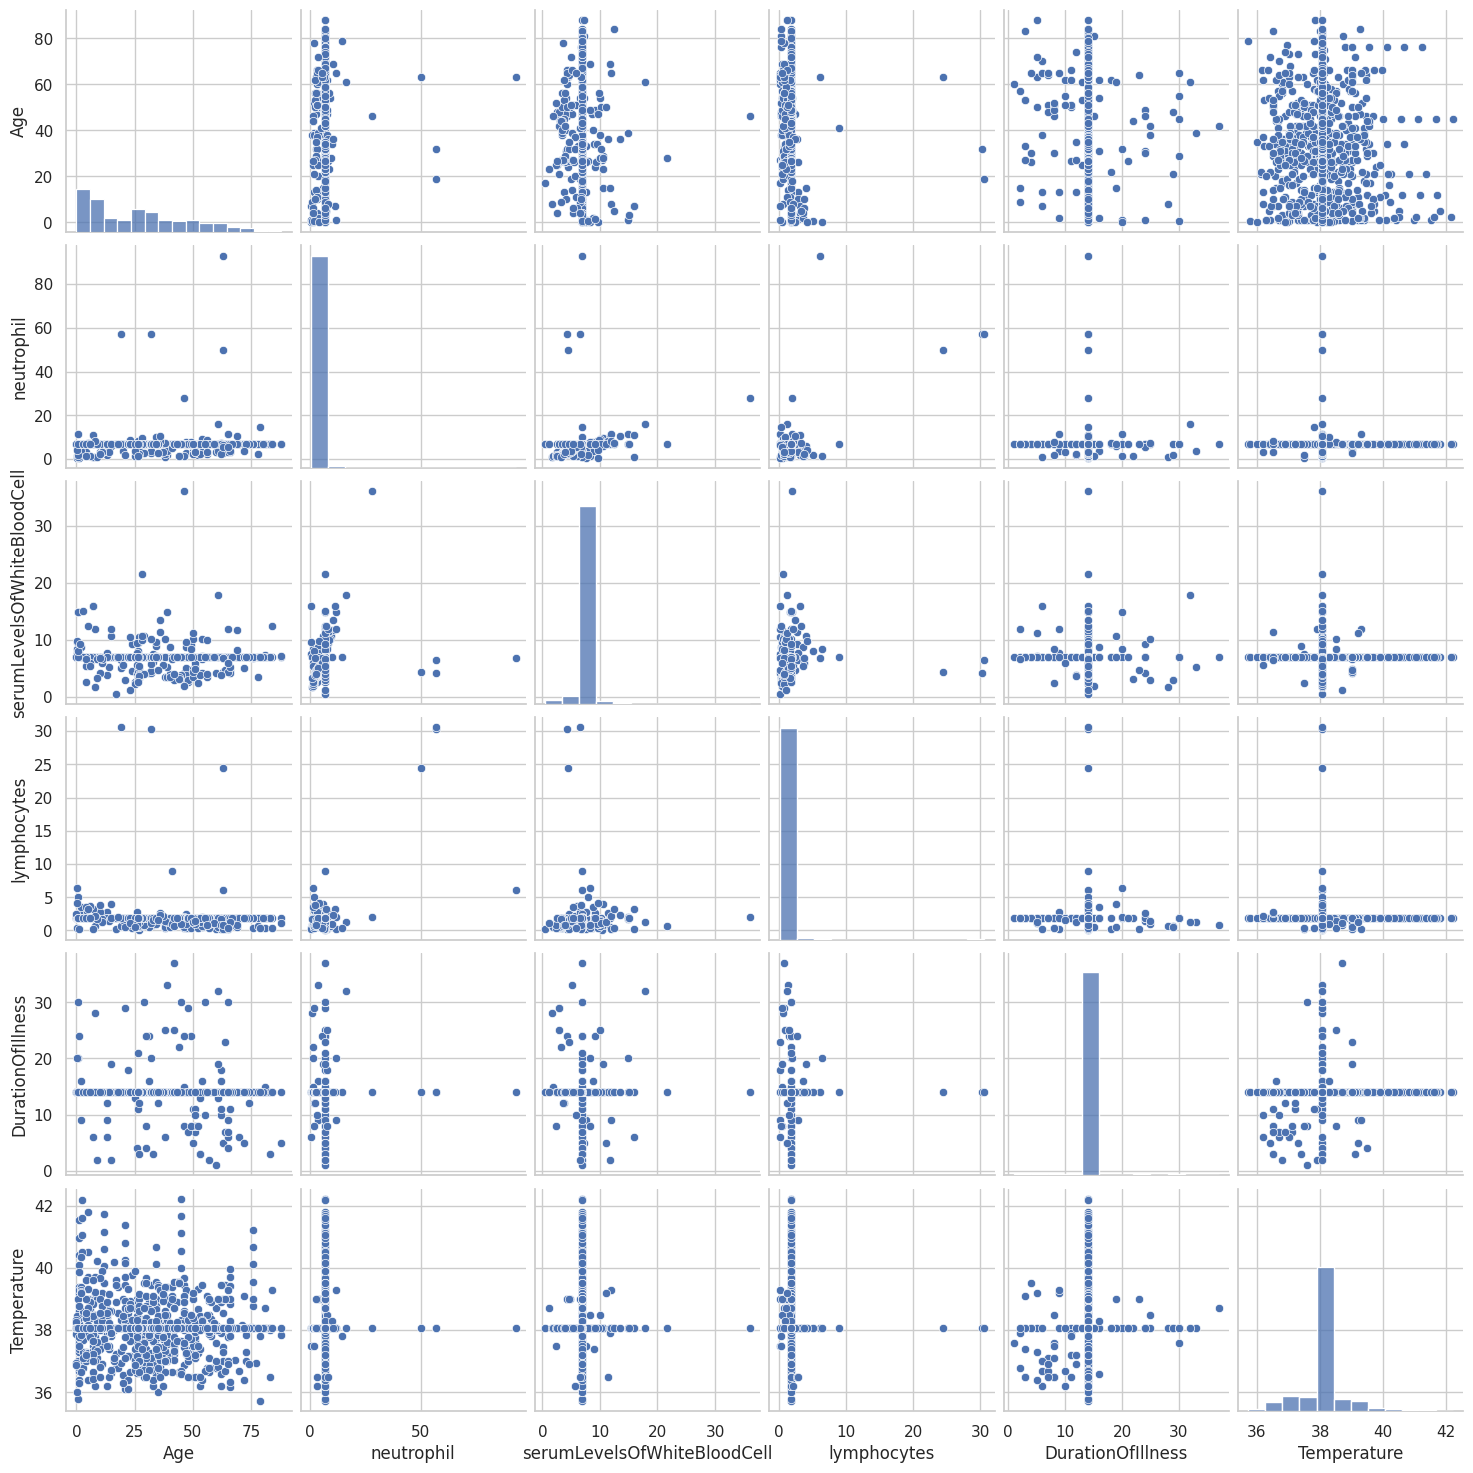

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load dataset
file_path = '/content/drive/MyDrive/machine learning/week 4/flu.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please upload the dataset or provide the correct path.")
    df = None

if df is not None:
    # =========================
    # 1. EXPLORATORY DATA ANALYSIS (EDA)
    # =========================
    print("\n--- Dataset Info ---")
    print(df.info())

    print("\n--- Descriptive Statistics ---")
    print(df.describe(include='all'))

    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    print("\n--- Dataset Preview ---")
    print(df.head())


    # =========================
    # 2. FEATURE ENGINEERING
    # =========================

    # Example: Create interaction term if features exist
    if {'feature1', 'feature2'}.issubset(df.columns):
        df['feature1_x_feature2'] = df['feature1'] * df['feature2']
        print("Feature 'feature1_x_feature2' created.")

    # Example: Fill missing values
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
            print(f"Filled missing values in '{col}'.")

    # Example: Convert categorical to numerical (One-Hot Encoding)
    categorical_cols = df.select_dtypes(include='object').columns
    if len(categorical_cols) > 0:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
        print(f"Applied one-hot encoding to categorical columns: {list(categorical_cols)}")

    # Histogram for numerical features
    print("\n--- Histograms ---")
    num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    # Boxplot for numerical features
    print("\n--- Boxplots ---")
    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=df[col], color='orange')
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

    # Correlation Heatmap
    if len(num_cols) > 1:
        print("\n--- Correlation Heatmap ---")
        plt.figure(figsize=(10, 8))
        corr_matrix = df[num_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
        plt.title('Correlation Matrix')
        plt.tight_layout()
        plt.show()

        # Pairplot
        if len(num_cols) <= 6:  # Pairplot can be slow if too many features
            print("\n--- Pairplot ---")
            sns.pairplot(df[num_cols])
            plt.show()
        else:
            print("Skipped pairplot: too many numerical features.")

else:
    print("Data not loaded. Skipping analysis.")


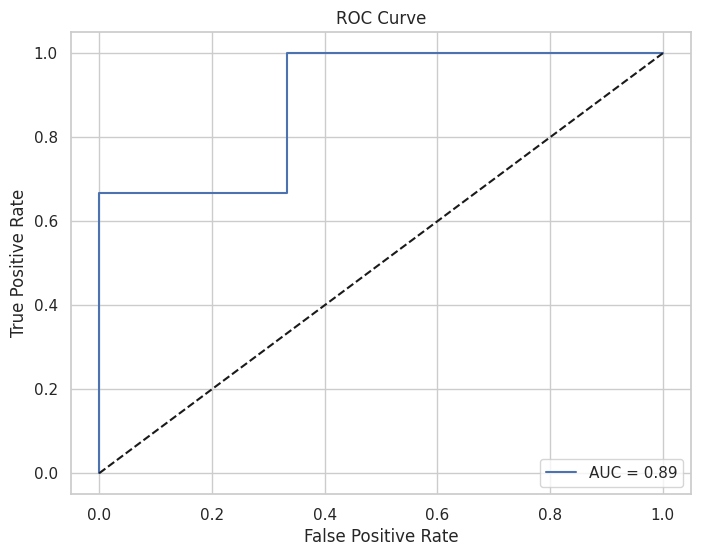

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
AUC: 0.888888888888889

--- Evaluation Metrics ---


,Metric,Value
0,Accuracy,0.666667
1,Precision,0.666667
2,Recall,0.666667
3,F1-score,0.666667
4,AUC,0.888889


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Example data (replace with your actual predictions)
y_true = np.array([0, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 1])
y_prob = np.array([0.1, 0.9, 0.4, 0.2, 0.8, 0.6])


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")


# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'],
    'Value': [accuracy, precision, recall, f1, auc]
})

print("\n--- Evaluation Metrics ---")
evaluation_metrics
